In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix
import nltk

import pickle

In [41]:
#Load in data and split for train and test sets
df = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(df['text_lemma'], df['Annotation'], test_size=0.25, random_state=12)
                                                       
df.head(5)

,id,text,Annotation,tokenized_text,text_lemma,pos_tags,Hate
0,5.969655e+17,i just found the perfect rental why cant my le...,Neither,"['found', 'perfect', 'rental', 'cant', 'lease'...","['found', 'perfect', 'rental', 'cant', 'lease'...","['i_NN', 'just_RB', 'found_VBD', 'the_DT', 'pe...",0
1,5.758918e+17,every time they discover anything its either ...,Neither,"['every', 'time', 'discover', 'anything', 'eit...","['every', 'time', 'discover', 'anything', 'eit...","['every_DT', 'time_NN', 'they_PRP', 'discover_...",0
2,5.952595e+17,ok time to write code bbl\n\nmaking a new thing,Neither,"['ok', 'time', 'write', 'code', 'bbl', 'making...","['ok', 'time', 'write', 'code', 'bbl', 'making...","['ok_JJ', 'time_NN', 'to_TO', 'write_VB', 'cod...",0
3,5.723449e+17,refined dessert not mkr,Neither,"['refined', 'dessert', 'mkr']","['refined', 'dessert', 'mkr']","['refined_VBN', 'dessert_NN', 'not_RB', 'mkr_VB']",0
4,5.681320e+17,one of the best things anyone can do to impr...,Neither,"['one', 'best', 'things', 'anyone', 'improve',...","['one', 'best', 'thing', 'anyone', 'improve', ...","['one_CD', 'of_IN', 'the_DT', 'best_JJS', 'thi...",0


In [42]:
#create count matrix
counts = CountVectorizer()
count_train = counts.fit_transform(X_train)
count_test = counts.transform(X_test)

## Default

In [43]:
SVM_default = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

In [44]:
# train classifier
print("training...")
SVM_default.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds = SVM_default.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [45]:
SVM_metrics = {}
SVM_default_precision = precision_score(y_test, SVM_test_preds, average='macro')
SVM_default_recall = recall_score(y_test, SVM_test_preds, average='macro')
SVM_default_macro_f1_score = f1_score(y_test, SVM_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_default_precision))
print('Recall: {:.3}'.format(SVM_default_recall))
print('Macro F1 Score: {:.3}'.format(SVM_default_macro_f1_score))

SVM_metrics['Default SVM'] = {'precision': SVM_default_precision, 'recall': SVM_default_recall, 
                              'macro_f1': SVM_default_macro_f1_score}

Model evaluation metrics
Precision: 0.814
Recall: 0.506
Macro F1 Score: 0.578


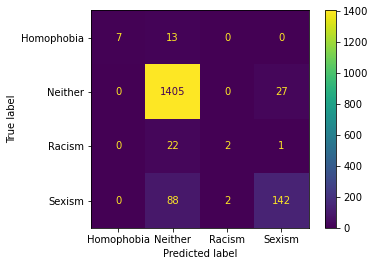

In [46]:
plot_confusion_matrix(SVM_default, count_test, y_test)

## Grid

In [47]:
SVM_default_grid = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'C': [1, 10, 30],  
              'gamma': ['auto', 0.1, 0.01], 
              'kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
              'coef0': [0.1, 1, 3],
              'degree': [1, 3, 5],
              'class_weight': [None, 'balanced']}

# grid search with f1 being the performance metric
SVM_grid = GridSearchCV(SVM_default_grid, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
SVM_grid.fit(count_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=  

[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.396, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.377, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.697, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.709, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.672, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.6

[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.712, total=   0.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.403, total=   2.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.411, total=   2.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.398, total=   2.3s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.464, total=   2.2s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.418, total=   2.2s
[CV] C=1, class_

[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.493, total=   1.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.536, total=   1.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.636, total=   1.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.574, total=   1.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.508, total=   1.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid, score=0.563, total=   0.6s
[CV] C=1, class_weigh

[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.4s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.4s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.697, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.709, total=   0.7s


[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.652, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.712, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.398, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.405, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.408, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.396, total=   0.8s
[CV] C=1, class_weight=

[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.398, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.405, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.408, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.396, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.377, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.232, total=   0.9s
[CV] C=1, class_weight=None, coe

[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.567, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.490, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.517, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.697, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.709, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.672, total=   0.7s
[CV] C=1, cla

[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=linear, score=0.712, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=1, class_weight=None

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.6s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=N

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.697, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.709, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.672, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.652, total=   0.7s
[CV]

[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.579, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.636, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.666, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.585, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.636, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf, score=0.398, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, de

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.612, total=   1.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.702, total=   1.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.678, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.635, total=   1.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid, score=0.689, total=   1.1s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmo

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.007, total=   3.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.007, total=   3.2s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   3.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   3.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   3.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=sigmoid, score=0.697, total=   2.0s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.708, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.737, total=   0.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.731, total=   0.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.702, total=   0.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degr

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.702, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.693, total=   0.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.270, total=   3.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.305, total=   3.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.344, total=   3.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=p

[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.006, total=   3.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.006, total=   3.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.649, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.612, total=   1.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.702, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.678, total=   1.8s
[

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   3.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   3.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.007, total=   3.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.007, total=   3.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   3.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.681, total=   2.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.675, total=   2.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.708, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.737, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.731, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.702, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.693, total=   0.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.612, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.725, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.722, total=   1.1s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.628, tota

[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.006, total=   3.2s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.006, total=   3.2s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.649, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.612, total=   1.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.702, total=   1.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.678, total=   1.8s
[

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   3.4s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   3.2s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.007, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.007, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   3.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.006, total=   3.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.006, total=   3.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.708, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.737, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.731, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.702, total=   0.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.693, total=   0.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.569, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.638, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.660, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.585, tota

[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.580, total=   1.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.533, total=   1.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.641, total=   1.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.580, total=   1.8s
[CV] C=10, c

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=rbf, score=0.236, total=   0.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sig

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.636, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.613, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.649, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.599, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.657, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly, score

[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.325, total=   3.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.328, total=   2.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.313, total=   2.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.320, total=   2.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.600, total=   0.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.652, total=   0.9s
[CV] C=

[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.641, total=   2.0s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.580, total=   1.9s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.618, total=   1.9s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.657, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.658, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.608, total=   0.6s
[CV] C=10, class

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.636, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.613, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.649, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.599, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.657, total=   

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.718, total=   0.9s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.682, total=   0.9s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.652, total=   0.9s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.714, total=   0.9s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.228, total=   0.9s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.228, total=   0.9s
[CV] C=10, class_weigh

[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.650, total=   0.9s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.712, total=   0.9s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.462, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.472, total=   0.9s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.565, total=   0.9s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.563, total=   0.

[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.636, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.613, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.649, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.599, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.657, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.697, total=   0.9s
[CV] C=10, 

[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.524, total=   0.9s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.523, total=   0.9s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.444, total=   0.9s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.580, total=   2.1s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.533, total=   2.0s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.641, total=   2.0s
[CV] C=10, class_weight=None, 

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.236, total=   0.9s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, tot

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.613, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.649, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.599, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.657, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.596, total=   0.9s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.625, total=   0.8s
[CV]

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.708, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.737, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.731, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.702, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.693, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, ke

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   3.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.577, total=   2.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.554, total=   2.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.666, total=   2.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.591, total=   2.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf,

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.677, total=   3.5s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.665, total=   3.5s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.508, total=   3.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.343, total=   3.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.549, total=   3.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.703, total=   1.2s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.663, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.666, total=   1.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.675, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.669, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, 

[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.669, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.624, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.624, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.679, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.708, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.714, total=   3.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.741, total=   3.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.685, total=   3.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.677, total=   3.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.577, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.5

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.699, total=   3.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.741, total=   3.8s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.677, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.665, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   3.7s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.736, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.718, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.690, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.683, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear, score=0.675, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5,

[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.669, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.624, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.624, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.679, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.708, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.739, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.717, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.688, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.688, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.577, total=   2.1s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.5

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.699, total=   3.1s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.741, total=   3.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.677, total=   3.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.665, total=   3.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   3.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.260, total=   3.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.323, total=   3.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.372, total=   3.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.483, total=   3.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.675, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5,

[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.610, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.653, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.596, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.648, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.679, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.709, total= 

[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   0.5s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.552, total=   1.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.534, total=   1.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.644, total=   1.7s
[CV] C=3

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.396, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.377, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.232, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, sc

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.720, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.630, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.610, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.653, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.596, total=   0.6s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, 

[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.679, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.709, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.696, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.644, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.701, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf, score=0.683, total=   0.8s
[CV] C=30, class_weight=None,

[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.644, total=   1.6s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.542, total=   1.6s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.621, total=   1.6s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.640, total=   0.5s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.675, total=   0.5s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.589, total=   0.5s
[CV] C=30, class

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.630, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.610, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.653, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.596, total=   0.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.648, total=   

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.708, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.678, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.653, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.700, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.398, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.405, total=   0.8s
[CV] C=30, class_weigh

[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.648, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.742, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.232, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.

[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.630, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.610, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.653, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.596, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.648, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly, score=0.605, total=   0.8s
[CV] C=30, 

[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.674, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.672, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.700, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.552, total=   1.7s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.534, total=   1.7s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.644, total=   1.7s
[CV] C=30, class_weight=None, 

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.687, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.672, total=   2.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.714, total=   2.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.741, total=   2.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.685, total=   2.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced,

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.671, total=   0.9s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.671, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.633, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.611, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.615, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, co

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.615, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.591, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.656, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.538, total=   1.9s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.549, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamm

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.007, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.228, total=   3.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.228, total=   3.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.006, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.571, total=   1.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1,

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.701, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.714, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.743, total=   2.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.699, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.687, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.703, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.715, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.700, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.662, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.667, total=   1.0s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=

[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.633, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.611, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.615, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.591, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.656, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.687, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.731, total=   1.7s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.731, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.688, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.702, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf, score

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.701, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.714, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.743, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.699, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.687, total=   2.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.651, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.699, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.738, total=   3.3s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.677, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.662, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=

[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.633, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.611, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.615, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.591, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.656, total=   0.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.715, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.740, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.728, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.678, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.693, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf, score

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 70.4min finished


GridSearchCV(cv=5, estimator=SVC(random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'coef0': [0.1, 1, 3], 'degree': [1, 3, 5],
                         'gamma': ['auto', 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
             scoring='f1_macro', verbose=3)

In [48]:
# train classifier
print("training...")
SVM_grid.best_estimator_.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds = SVM_grid.best_estimator_.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [49]:
SVM_grid_precision = precision_score(y_test, SVM_test_preds, average='macro') 
SVM_grid_recall = recall_score(y_test, SVM_test_preds, average='macro')
SVM_grid_macro_f1_score = f1_score(y_test, SVM_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_grid_precision))
print('Recall: {:.3}'.format(SVM_grid_recall))
print('Macro F1 Score: {:.3}'.format(SVM_grid_macro_f1_score))

SVM_metrics['Grid Search SVM'] = {'precision': SVM_grid_precision, 'recall': SVM_grid_recall, 
                                  'macro_f1': SVM_grid_macro_f1_score}

Model evaluation metrics
Precision: 0.77
Recall: 0.744
Macro F1 Score: 0.747


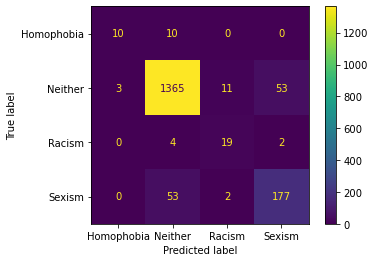

In [50]:
plot_confusion_matrix(SVM_grid.best_estimator_, count_test, y_test)

In [51]:
#compare parameters
results = pd.DataFrame.from_dict(SVM_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\SVM_count_results_multi",
               index=False)
results

,precision,recall,macro_f1
Default SVM,0.813699,0.505804,0.578060
Grid Search SVM,0.769781,0.744036,0.747218


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   1.1s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=  

[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.288, total=   1.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.322, total=   1.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.579, total=   1.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.599, total=   1.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.589, total=   1.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.6

[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.683, total=   1.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.353, total=   4.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.358, total=   4.3s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.407, total=   4.3s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.348, total=   4.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.348, total=   4.6s
[CV] C=1, class_

[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.358, total=   3.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.401, total=   3.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.416, total=   3.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.388, total=   3.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.350, total=   4.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid, score=0.363, total=   0.9s
[CV] C=1, class_weigh

[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.579, total=   1.4s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.599, total=   1.4s


[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.637, total=   1.4s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.683, total=   1.4s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.326, total=   1.6s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.263, total=   1.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.246, total=   1.4s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.307, total=   1.4s
[CV] C=1, class_weight=

[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.385, total=   1.7s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.401, total=   1.7s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.404, total=   1.7s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.395, total=   1.7s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.379, total=   1.7s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.228, total=   1.4s
[CV] C=1, class_weight=None, coe

[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.358, total=   1.0s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.363, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.341, total=   0.9s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.579, total=   1.4s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.599, total=   1.4s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.589, total=   1.5s
[CV] C=1, cla

[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=linear, score=0.683, total=   1.6s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   1.0s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   1.0s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.228, total=   0.9s
[CV] C=1, class_weight=None

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   1.0s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   1.0s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   1.0s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   1.0s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=1, class_weight=N

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.228, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.579, total=   1.4s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.599, total=   1.4s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.589, total=   1.4s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.637, total=   1.4s
[CV]

[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.496, total=   2.1s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.575, total=   2.2s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.590, total=   2.1s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.511, total=   2.0s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.545, total=   1.9s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf, score=0.385, total=   1.8s
[CV] C=1, class_weight=None, coef0=3, de

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.466, total=   4.1s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.502, total=   4.5s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.440, total=   4.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.506, total=   4.5s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid, score=0.445, total=   2.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmo

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.007, total=   5.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.007, total=   5.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   5.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   5.5s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   5.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=sigmoid, score=0.644, total=   3.9s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.626, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.613, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.612, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.664, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degr

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.664, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.688, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.288, total=   7.1s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.337, total=   6.5s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.356, total=   5.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=p

[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.006, total=   6.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.006, total=   6.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.535, total=   5.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.466, total=   4.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.502, total=   5.1s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.440, total=   5.3s
[

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   5.1s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   5.1s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.007, total=   5.4s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.007, total=   5.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   5.4s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.564, total=   5.4s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.553, total=   5.1s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.626, total=   1.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.613, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.612, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.664, total=   1.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.688, total=   1.5s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.490, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.495, total=   3.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.547, total=   3.0s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.482, tota

[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.006, total=   6.1s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.006, total=   6.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.535, total=   5.1s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.466, total=   4.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.502, total=   5.1s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.440, total=   5.2s
[

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   6.1s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.006, total=   6.1s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.007, total=   6.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.007, total=   6.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.006, total=   6.5s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.006, total=   6.4s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.006, total=   6.5s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.626, total=   1.5s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.613, total=   1.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.612, total=   1.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.664, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.688, total=   1.5s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.496, total=   2.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.577, total=   2.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.590, total=   2.0s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.511, tota

[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.228, total=   1.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.228, total=   1.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.455, total=   4.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.441, total=   4.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.479, total=   4.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.386, total=   5.0s
[CV] C=10, c

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=rbf, score=0.228, total=   1.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   1.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   1.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   1.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   1.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sig

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.543, total=   1.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.575, total=   1.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.598, total=   1.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.607, total=   1.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.626, total=   1.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly, score

[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.353, total=   7.1s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.397, total=   5.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.358, total=   6.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.385, total=   6.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.497, total=   1.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.561, total=   1.7s
[CV] C=

[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.479, total=   4.6s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.386, total=   5.0s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.461, total=   4.4s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.422, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.414, total=   0.9s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.450, total=   0.8s
[CV] C=10, class

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.228, total=   1.4s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.543, total=   1.4s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.575, total=   1.5s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.598, total=   1.5s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.607, total=   1.4s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.626, total=   

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.585, total=   1.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.599, total=   1.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.571, total=   1.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.637, total=   1.7s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.228, total=   1.4s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.228, total=   1.4s
[CV] C=10, class_weigh

[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.527, total=   1.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.633, total=   1.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.381, total=   1.4s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.433, total=   1.4s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.403, total=   1.4s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.427, total=   1.

[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.543, total=   1.4s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.575, total=   1.4s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.598, total=   1.4s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.607, total=   1.3s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.626, total=   1.3s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.579, total=   1.5s
[CV] C=10, 

[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.402, total=   1.6s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.394, total=   1.5s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.379, total=   1.6s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.455, total=   4.5s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.441, total=   4.7s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.479, total=   4.7s
[CV] C=10, class_weight=None, 

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.228, total=   1.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, tot

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.575, total=   1.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.598, total=   1.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.607, total=   1.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.626, total=   1.4s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.545, total=   1.6s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.584, total=   1.7s
[CV]

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.626, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.613, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.612, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.664, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.687, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, ke

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   5.5s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.455, total=   4.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.441, total=   4.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.472, total=   4.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.382, total=   4.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf,

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.505, total=   5.5s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.518, total=   5.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.447, total=   5.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.338, total=   5.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.330, total=   5.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.688, total=   2.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.648, total=   2.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.703, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.571, total=   1.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.572, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, 

[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.572, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.599, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.638, total=   1.3s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.671, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.626, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.527, total=   5.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.554, total=   5.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.546, total=   4.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.563, total=   5.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.455, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.4

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.508, total=   5.3s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.471, total=   5.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.505, total=   5.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.518, total=   5.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   5.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.617, total=   2.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.652, total=   2.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.641, total=   2.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.690, total=   2.3s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear, score=0.571, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5,

[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.572, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.599, total=   1.3s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.638, total=   1.3s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.671, total=   1.3s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.626, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.660, total=   2.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.654, total=   2.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.638, total=   2.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.665, total=   2.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.455, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.4

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.508, total=   5.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.471, total=   5.1s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.505, total=   5.1s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.518, total=   5.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   5.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.382, total=   5.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.289, total=   6.3s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.422, total=   6.3s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.222, total=   6.1s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.571, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5,

[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.571, total=   1.3s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.596, total=   1.3s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.607, total=   1.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.626, total=   1.5s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.563, total=   1.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.570, total= 

[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.228, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.455, total=   4.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.440, total=   4.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.477, total=   4.8s
[CV] C=3

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.228, total=   1.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.232, total=   1.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   1.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   1.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   1.3s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, sc

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.676, total=   1.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.537, total=   1.3s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.571, total=   1.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.596, total=   1.3s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.607, total=   1.3s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, 

[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.563, total=   1.4s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.570, total=   1.4s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.601, total=   1.4s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.643, total=   1.4s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.675, total=   1.4s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf, score=0.581, total=   1.6s
[CV] C=30, class_weight=None,

[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.477, total=   4.5s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.386, total=   4.5s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.461, total=   4.1s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.434, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.448, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.455, total=   0.7s
[CV] C=30, class

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.228, total=   1.4s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.537, total=   1.3s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.571, total=   1.3s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.596, total=   1.3s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.607, total=   1.3s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.626, total=   

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.581, total=   1.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.619, total=   1.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.545, total=   1.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.637, total=   1.6s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   1.4s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.228, total=   1.4s
[CV] C=30, class_weigh

[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.566, total=   1.6s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.656, total=   1.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.228, total=   1.4s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.228, total=   1.3s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.228, total=   1.3s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.228, total=   1.

[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.537, total=   1.4s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.571, total=   1.4s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.596, total=   1.4s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.607, total=   1.4s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.626, total=   1.2s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly, score=0.547, total=   1.6s
[CV] C=30, 

[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.589, total=   1.5s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.638, total=   1.4s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.683, total=   1.4s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.455, total=   4.1s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.440, total=   4.4s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.477, total=   4.4s
[CV] C=30, class_weight=None, 

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.623, total=   4.4s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.595, total=   4.9s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.527, total=   4.9s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.553, total=   4.9s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.543, total=   4.9s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced,

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.659, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.688, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.545, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.578, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.598, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, co

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.598, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.607, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.616, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.482, total=   3.4s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.490, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamm

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.007, total=   5.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.228, total=   5.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.228, total=   5.4s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.006, total=   5.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.453, total=   4.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1,

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.638, total=   4.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.579, total=   4.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.638, total=   4.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.605, total=   4.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.623, total=   4.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.701, total=   1.9s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.576, total=   1.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.684, total=   1.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.645, total=   1.9s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.681, total=   1.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=

[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.545, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.578, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.598, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.607, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.616, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.674, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.661, total=   3.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.635, total=   3.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.624, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.637, total=   3.1s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf, score

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.638, total=   4.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.579, total=   3.9s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.638, total=   4.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.605, total=   3.9s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.623, total=   3.9s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.592, total=   5.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.531, total=   5.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.544, total=   5.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.537, total=   5.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.535, total=   5.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=

[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.545, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.578, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.598, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.607, total=   1.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.616, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.626, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.614, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.612, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.664, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.679, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf, score

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 132.1min finished


training...
complete.
predicting...
complete.
Model evaluation metrics
Precision: 0.821
Recall: 0.592
Macro F1 Score: 0.639


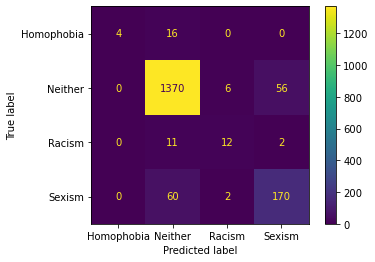

In [57]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df['pos_tags'], df['Annotation'], test_size=0.25, random_state=12)
                                                       
count_train_pos = counts.fit_transform(X_train_pos)
count_test_pos = counts.transform(X_test_pos)

SVM_grid_pos = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'C': [1, 10, 30],  
              'gamma': ['auto', 0.1, 0.01], 
              'kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
              'coef0': [0.1, 1, 3],
              'degree': [1, 3, 5],
              'class_weight': [None, 'balanced']}

# grid search with f1 being the performance metric
SVM_grid_pos = GridSearchCV(SVM_grid_pos, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
SVM_grid_pos.fit(count_train_pos, y_train_pos)

# train classifier
print("training...")
SVM_grid_pos.best_estimator_.fit(count_train_pos, y_train_pos)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds_pos = SVM_grid_pos.best_estimator_.predict(count_test_pos)
print("complete.")

SVM_grid_pos_precision = precision_score(y_test_pos, SVM_test_preds_pos, average='macro')
SVM_grid_pos_recall = recall_score(y_test_pos, SVM_test_preds_pos, average='macro')
SVM_grid_pos_macro_f1_score = f1_score(y_test_pos, SVM_test_preds_pos, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_grid_pos_precision))
print('Recall: {:.3}'.format(SVM_grid_pos_recall))
print('Macro F1 Score: {:.3}'.format(SVM_grid_pos_macro_f1_score))

SVM_metrics['Grid Search SVM with POS'] = {'precision': SVM_grid_pos_precision, 'recall': SVM_grid_pos_recall, 
                                           'macro_f1': SVM_grid_pos_macro_f1_score}

plot_confusion_matrix(SVM_grid_pos.best_estimator_, count_test_pos, y_test_pos)

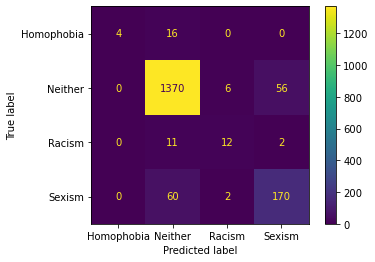

In [58]:
plot_confusion_matrix(SVM_grid_pos, count_test_pos, y_test_pos)

In [59]:
#compare parameters
results = pd.DataFrame.from_dict(SVM_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\SVM_count_results_multi.csv",
               index=True)
results

,precision,recall,macro_f1
Default SVM,0.813699,0.505804,0.578060
Grid Search SVM,0.769781,0.744036,0.747218
Grid Search SVM with POS,0.821476,0.592366,0.638556
